In [34]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, classification_report
import pickle
import warnings
warnings.simplefilter("ignore")

Objective : To find out patterns and evaluate stock indicators which provide useful information for investors to invest 
and sell using Random Forest Classifier approach. 

# Data Preprocessing  - Load data


In [35]:
Data = pd.read_csv(r"D:\Downloads\New Stock Data.csv")


Data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,08-02-2019,48.599998,48.930000,48.470001,48.910000,46.454433,906700.0,NVO
1,11-02-2019,48.680000,48.810001,48.419998,48.660000,46.216980,1001200.0,NVO
2,12-02-2019,48.990002,49.480000,48.830002,49.400002,46.919834,868600.0,NVO
3,13-02-2019,49.040001,49.279999,49.020000,49.090000,46.625393,868900.0,NVO
4,20-02-2019,49.840000,50.009998,49.549999,49.700001,47.204773,1063800.0,NVO


In [36]:
Data['Date'] = Data['Date'].astype('datetime64[ns]')


In [37]:
Data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
Symbol               object
dtype: object

# Calculating change in price from one period to the next

In [38]:
# sorting the values by symbol and then date
Data.sort_values(by = ['Symbol','Date'], inplace = True)

# calculating the change in price
Data['change_in_price'] = Data['Close'].diff()

Data

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,change_in_price
18050,2020-12-14,56.925999,60.691002,50.000000,50.009998,50.009998,1360200.0,ABCL,NaN
18051,2020-12-16,47.130001,49.730000,42.150002,47.529999,47.529999,1360200.0,ABCL,-2.480000
18052,2020-12-17,48.540001,50.500000,48.139999,48.599998,48.599998,636300.0,ABCL,1.070000
18053,2020-12-18,49.200001,49.799999,48.160000,49.220001,49.220001,424500.0,ABCL,0.620003
18054,2020-12-21,48.500000,48.990002,43.632000,45.299999,45.299999,912700.0,ABCL,-3.920002
...,...,...,...,...,...,...,...,...,...
69580,2022-07-02,7.900000,8.330000,7.830000,7.960000,7.960000,531800.0,ZYME,-6.150000
69581,2022-08-02,7.940000,7.960000,7.500000,7.640000,7.640000,1017300.0,ZYME,-0.320000
69566,2022-10-01,14.000000,14.330000,13.450000,14.280000,14.280000,562700.0,ZYME,6.640000
69567,2022-11-01,14.300000,15.080000,14.010000,14.550000,14.550000,342900.0,ZYME,0.270000


In [39]:
#symbol correcting

# identify rows where the symbol changes
mask = Data['Symbol'] != Data['Symbol'].shift(1)

# For those rows, make the value null
Data['change_in_price'] = np.where(mask == True, np.nan, Data['change_in_price'])

# printing rows that have a null value, should only be 5
Data[Data.isna().any(axis = 1)]

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,change_in_price
18050,2020-12-14,56.925999,60.691002,50.000000,50.009998,50.009998,1360200.0,ABCL,NaN
13998,2020-01-12,19.100000,19.309999,18.875000,19.280001,19.280001,61400.0,ABCM,NaN
83802,2021-01-09,18.000000,18.030001,16.790001,17.290001,17.290001,97400.0,ABOS,NaN
46060,2021-01-09,18.940001,19.389000,18.170000,18.879999,18.879999,223900.0,ABSI,NaN
12677,2019-01-04,27.120001,27.420000,26.850000,26.980000,26.980000,1126700.0,ACAD,NaN
...,...,...,...,...,...,...,...,...,...
78078,2019-01-03,8.000000,9.500000,7.750000,9.340000,8.047803,540800.0,XBIT,NaN
75483,2021-01-11,17.040001,19.020000,17.000000,19.020000,19.020000,197300.0,XLO,NaN
80296,2019-01-03,21.799999,21.799999,20.750000,21.100000,21.100000,48300.0,YMAB,NaN
46688,2019-01-03,15.120000,15.120000,14.970000,15.030000,15.030000,16300.0,ZEAL,NaN


In [40]:
Data

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,change_in_price
18050,2020-12-14,56.925999,60.691002,50.000000,50.009998,50.009998,1360200.0,ABCL,NaN
18051,2020-12-16,47.130001,49.730000,42.150002,47.529999,47.529999,1360200.0,ABCL,-2.480000
18052,2020-12-17,48.540001,50.500000,48.139999,48.599998,48.599998,636300.0,ABCL,1.070000
18053,2020-12-18,49.200001,49.799999,48.160000,49.220001,49.220001,424500.0,ABCL,0.620003
18054,2020-12-21,48.500000,48.990002,43.632000,45.299999,45.299999,912700.0,ABCL,-3.920002
...,...,...,...,...,...,...,...,...,...
69580,2022-07-02,7.900000,8.330000,7.830000,7.960000,7.960000,531800.0,ZYME,-6.150000
69581,2022-08-02,7.940000,7.960000,7.500000,7.640000,7.640000,1017300.0,ZYME,-0.320000
69566,2022-10-01,14.000000,14.330000,13.450000,14.280000,14.280000,562700.0,ZYME,6.640000
69567,2022-11-01,14.300000,15.080000,14.010000,14.550000,14.550000,342900.0,ZYME,0.270000


In [41]:
#smooothing to remove randomness and noise from price data 

In [42]:
# no of days wanting to predict
days_out = 1825

Data_smoothed = Data.groupby(['Symbol'])[['Close','Low','High','Open','Volume']].transform(lambda x: x.ewm(span = days_out).mean())
smoothed_Data = pd.concat([Data[['Symbol','Date']], Data_smoothed], axis=1, sort=False)

smoothed_Data

,Symbol,Date,Close,Low,High,Open,Volume
18050,ABCL,2020-12-14,50.009998,50.000000,60.691002,56.925999,1.360200e+06
18051,ABCL,2020-12-16,48.769319,46.072850,55.207498,52.025316,1.360200e+06
18052,ABCL,2020-12-17,48.712817,46.762655,53.636612,50.862271,1.118636e+06
18053,ABCL,2020-12-18,48.839822,47.112566,52.675881,50.446020,9.448163e+05
18054,ABCL,2020-12-21,48.130305,46.414926,51.937089,50.055962,9.383789e+05
...,...,...,...,...,...,...,...
69580,ZYME,2022-07-02,32.079459,31.202150,32.984221,32.136558,4.154628e+05
69581,ZYME,2022-08-02,32.031021,31.155174,32.934625,32.088602,4.166556e+05
69566,ZYME,2022-10-01,31.995871,31.120115,32.897785,32.052783,4.169448e+05
69567,ZYME,2022-11-01,31.961356,31.086263,32.862533,32.017661,4.167983e+05


# Signal Flag

In [43]:
days_out = 1825

# creating a new column that will house the flag, and for each group calculate the diff compared to 1825 days ago. Then use Numpy to define the sign.
smoothed_Data['Signal_Flag'] = smoothed_Data.groupby('Symbol')['Close'].transform(lambda x : np.sign(x.diff(days_out)))

smoothed_Data.head(50)

,Symbol,Date,Close,Low,High,Open,Volume,Signal_Flag
18050,ABCL,2020-12-14,50.009998,50.000000,60.691002,56.925999,1.360200e+06,NaN
18051,ABCL,2020-12-16,48.769319,46.072850,55.207498,52.025316,1.360200e+06,NaN
18052,ABCL,2020-12-17,48.712817,46.762655,53.636612,50.862271,1.118636e+06,NaN
18053,ABCL,2020-12-18,48.839822,47.112566,52.675881,50.446020,9.448163e+05,NaN
18054,ABCL,2020-12-21,48.130305,46.414926,51.937089,50.055962,9.383789e+05,NaN
18055,ABCL,2020-12-22,47.961459,45.771512,51.277437,49.648855,9.429115e+05,NaN
18056,ABCL,2020-12-23,47.287611,45.316948,50.519604,49.080010,1.002720e+06,NaN
18057,ABCL,2020-12-24,46.676823,44.756435,49.701524,48.349715,9.531532e+05,NaN
18058,ABCL,2020-12-28,45.993077,44.035905,48.949178,47.713634,9.714160e+05,NaN
18059,ABCL,2020-12-29,45.290316,43.429333,48.200581,47.052019,1.010486e+06,NaN


# Relative Strength Index (RSI)- Stock Momentum Indicator.

In [44]:
# using a condition that will set the value to 0 if the price went up for down days and vice versa for up day

# Calculating the 14 day RSI
n = 14

# making copy of the data frame twice
up_Data, down_Data = Data[['Symbol','change_in_price']].copy(),Data[['Symbol','change_in_price']].copy()

# For up days, if the change is less than 0 set to 0.
up_Data.loc['change_in_price'] = up_Data.loc[(up_Data['change_in_price'] < 0), 'change_in_price'] = 0

# For down days, if the change is greater than 0 set to 0.
down_Data.loc['change_in_price'] = down_Data.loc[(down_Data['change_in_price'] > 0), 'change_in_price'] = 0

# making change in price to be absolute.
down_Data['change_in_price'] = down_Data['change_in_price'].abs()

# Calculating the EWMA (Exponential Weighted Moving Average), meaning older values are given less weight compared to newer values.
ewma_up = up_Data.groupby('Symbol')['change_in_price'].transform(lambda x: x.ewm(span = n).mean())
ewma_down = down_Data.groupby('Symbol')['change_in_price'].transform(lambda x: x.ewm(span = n).mean())

# Relative Strength
relative_strength = ewma_up / ewma_down

# Relative Strength Index
relative_strength_index = 100.0 - (100.0 / (1.0 + relative_strength))

Data['down_days'] = down_Data['change_in_price']
Data['up_days'] = up_Data['change_in_price']
Data['RSI'] = relative_strength_index

Data.head(30)


,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,change_in_price,down_days,up_days,RSI
18050,2020-12-14,56.925999,60.691002,50.000000,50.009998,50.009998,1360200.0,ABCL,NaN,NaN,NaN,NaN
18051,2020-12-16,47.130001,49.730000,42.150002,47.529999,47.529999,1360200.0,ABCL,-2.480000,2.480000,0.000000,0.000000
18052,2020-12-17,48.540001,50.500000,48.139999,48.599998,48.599998,636300.0,ABCL,1.070000,0.000000,1.070000,33.236693
18053,2020-12-18,49.200001,49.799999,48.160000,49.220001,49.220001,424500.0,ABCL,0.620003,0.000000,0.620003,45.375206
18054,2020-12-21,48.500000,48.990002,43.632000,45.299999,45.299999,912700.0,ABCL,-3.920002,3.920002,0.000000,19.504634
18055,2020-12-22,47.619999,47.990002,42.564999,47.119999,47.119999,965500.0,ABCL,1.820000,0.000000,1.820000,38.338333
18056,2020-12-23,45.680000,45.990002,42.599998,43.259998,43.259998,1360200.0,ABCL,-3.860001,3.860001,0.000000,24.379410
18057,2020-12-24,43.259998,44.000000,40.849998,42.419998,42.419998,607700.0,ABCL,-0.840000,0.840000,0.000000,22.337256
18058,2020-12-28,42.650002,42.959999,38.299999,40.549999,40.549999,1116800.0,ABCL,-1.869999,1.869999,0.000000,18.382051
18059,2020-12-29,41.130001,41.500000,38.000000,39.000000,39.000000,1360200.0,ABCL,-1.549999,1.549999,0.000000,15.719929


# Goal is to predict - whether the next day is either a down_day or an up_day.

In [45]:
# Creating a column that we want to predict
close_groups = Data.groupby('Symbol')['Close']

# Applying the lambda function which will return -1.0 for down, 1.0 for up and 0.0 for no change.
close_groups = close_groups.transform(lambda x : np.sign(x.diff()))


Data['Prediction'] = close_groups

# keeping this as a binary classifier, changing flat days and considering as them up days.
Data.loc[Data['Prediction'] == 0.0] = 1.0

Data.head(50)



,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,change_in_price,down_days,up_days,RSI,Prediction
18050,2020-12-14 00:00:00,56.925999,60.691002,50.000000,50.009998,50.009998,1360200.0,ABCL,NaN,NaN,NaN,NaN,NaN
18051,2020-12-16 00:00:00,47.130001,49.730000,42.150002,47.529999,47.529999,1360200.0,ABCL,-2.480000,2.480000,0.000000,0.000000,-1.0
18052,2020-12-17 00:00:00,48.540001,50.500000,48.139999,48.599998,48.599998,636300.0,ABCL,1.070000,0.000000,1.070000,33.236693,1.0
18053,2020-12-18 00:00:00,49.200001,49.799999,48.160000,49.220001,49.220001,424500.0,ABCL,0.620003,0.000000,0.620003,45.375206,1.0
18054,2020-12-21 00:00:00,48.500000,48.990002,43.632000,45.299999,45.299999,912700.0,ABCL,-3.920002,3.920002,0.000000,19.504634,-1.0
18055,2020-12-22 00:00:00,47.619999,47.990002,42.564999,47.119999,47.119999,965500.0,ABCL,1.820000,0.000000,1.820000,38.338333,1.0
18056,2020-12-23 00:00:00,45.680000,45.990002,42.599998,43.259998,43.259998,1360200.0,ABCL,-3.860001,3.860001,0.000000,24.379410,-1.0
18057,2020-12-24 00:00:00,43.259998,44.000000,40.849998,42.419998,42.419998,607700.0,ABCL,-0.840000,0.840000,0.000000,22.337256,-1.0
18058,2020-12-28 00:00:00,42.650002,42.959999,38.299999,40.549999,40.549999,1116800.0,ABCL,-1.869999,1.869999,0.000000,18.382051,-1.0
18059,2020-12-29 00:00:00,41.130001,41.500000,38.000000,39.000000,39.000000,1360200.0,ABCL,-1.549999,1.549999,0.000000,15.719929,-1.0


In [46]:
# removing NaN value from rows.
print('Before NaN Drop we have {} rows and {} columns'.format(Data.shape[0], Data.shape[1]))

Data = Data.dropna()
print('After NaN Drop we have {} rows and {} columns'.format(Data.shape[0], Data.shape[1]))

Data.head()

Before NaN Drop we have 89929 rows and 13 columns
After NaN Drop we have 89731 rows and 13 columns


,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,change_in_price,down_days,up_days,RSI,Prediction
18051,2020-12-16 00:00:00,47.130001,49.730000,42.150002,47.529999,47.529999,1360200.0,ABCL,-2.480000,2.480000,0.000000,0.000000,-1.0
18052,2020-12-17 00:00:00,48.540001,50.500000,48.139999,48.599998,48.599998,636300.0,ABCL,1.070000,0.000000,1.070000,33.236693,1.0
18053,2020-12-18 00:00:00,49.200001,49.799999,48.160000,49.220001,49.220001,424500.0,ABCL,0.620003,0.000000,0.620003,45.375206,1.0
18054,2020-12-21 00:00:00,48.500000,48.990002,43.632000,45.299999,45.299999,912700.0,ABCL,-3.920002,3.920002,0.000000,19.504634,-1.0
18055,2020-12-22 00:00:00,47.619999,47.990002,42.564999,47.119999,47.119999,965500.0,ABCL,1.820000,0.000000,1.820000,38.338333,1.0


# Building the model 

In [47]:
Data.loc[:,"RSI"]

18051     0.000000
18052    33.236693
18053    45.375206
18054    19.504634
18055    38.338333
           ...    
69580    41.780161
69581    41.236205
69566    55.200831
69567    55.694821
69568    55.278044
Name: RSI, Length: 89731, dtype: float64

# Spilting the data as training and test 

In [48]:
X = Data[['RSI']]
Y = Data['Prediction']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0)


In [50]:
sc = StandardScaler()
normed_X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X.columns)
normed_X_test = pd.DataFrame(sc.transform(X_test), columns = X.columns)

In [51]:
normed_X_train

,RSI
0,0.273251
1,-2.258568
2,1.151358
3,-0.148151
4,-0.674465
...,...
67293,0.364112
67294,1.193777
67295,-0.103379
67296,0.189698


In [52]:
rand_frst_clf = RandomForestClassifier(n_estimators = 100,max_depth = 5, oob_score = True, criterion = "gini", random_state = 0)

rand_frst_clf.fit(normed_X_train, y_train)

# Making predictions
y_pred = rand_frst_clf.predict(normed_X_test)

# Checking model accuracy :

In [53]:
#R2 
from sklearn.metrics import r2_score 
X = normed_X_test
y = y_test
R_square = r2_score(X, y) 
print('Coefficient of Determination', R_square) 

Coefficient of Determination -1.0548283243606749


In [54]:
print('Correct Prediction (%): ', accuracy_score(y_test, rand_frst_clf.predict(normed_X_test), normalize = True) * 100.0)

Correct Prediction (%):  70.56122676414212


# Confusion Matrix - for evaluation of the model

Accuracy: 0.7056122676414212
Percision: 0.7421522681050491
Recall: 0.6947272576773446
Specificity: 0.7183153013910355


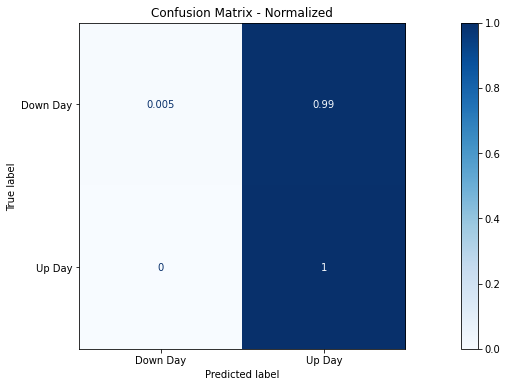

In [55]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

rf_matrix = confusion_matrix(y_test, y_pred)

true_negatives = rf_matrix[0][0]
false_negatives = rf_matrix[1][0]
true_positives = rf_matrix[1][1]
false_positives = rf_matrix[0][1]

accuracy = (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives)
percision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print('Accuracy: {}'.format(float(accuracy)))
print('Percision: {}'.format(float(percision)))
print('Recall: {}'.format(float(recall)))
print('Specificity: {}'.format(float(specificity)))

disp = plot_confusion_matrix(rand_frst_clf, X_test, y_test, display_labels = ['Down Day', 'Up Day'], normalize = 'true', cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix - Normalized')
plt.show()

# Building Classifier Report

In [56]:
target_names = ['Down Day', 'Up Day']

report = classification_report(y_true = y_test, y_pred = y_pred, target_names = target_names, output_dict = True)

report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
Down Day,0.668465,0.718315,0.692494,10352.000000
Up Day,0.742152,0.694727,0.717657,12081.000000
accuracy,0.705612,0.705612,0.705612,0.705612
macro avg,0.705308,0.706521,0.705076,22433.000000
weighted avg,0.708148,0.705612,0.706045,22433.000000


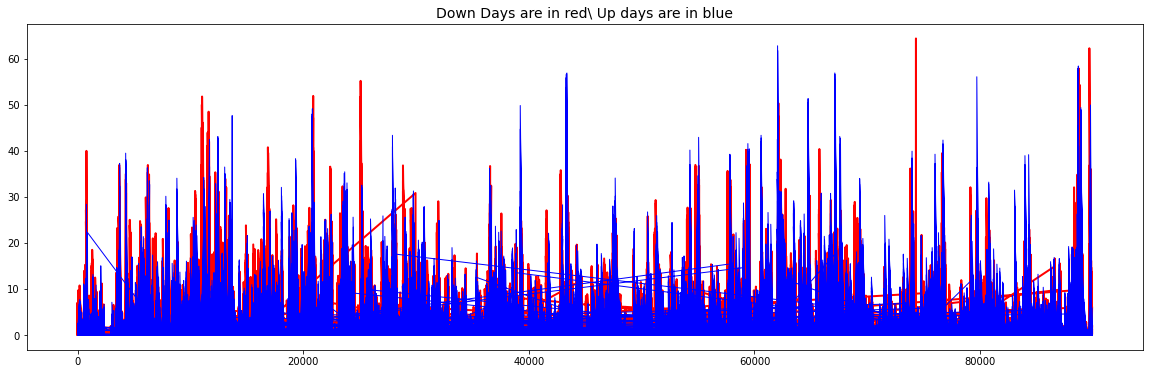

In [73]:
#plotting down and up days  
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (20,6)
plt.plot(Data['down_days'],color='red', linewidth= 2)
plt.title('Down Days are in red\ Up days are in blue', fontsize = 14, color = 'black')
plt.plot(Data['up_days'],color='blue', linewidth = 1)

# Predicting up and down days for one month in future

In [66]:
prediction = pd.DataFrame({"Prediction": y_pred}, index=pd.date_range(start='2022-3-21', periods=len(y_pred), freq="D"))
prediction.to_csv("Predicted-price-data.csv")
#colllects future days from predicted values
onemonth_Data = pd.DataFrame(predictions[:31])
onemonth_Data.to_csv("one-month-prediction.csv")


up days and date
            Prediction
Unnamed: 0            
2022-03-23         1.0
2022-03-24         1.0
2022-03-26         1.0
2022-03-27         1.0
2022-04-02         1.0
2022-04-03         1.0
2022-04-06         1.0
2022-04-07         1.0
2022-04-09         1.0
2022-04-11         1.0
2022-04-12         1.0
2022-04-14         1.0
2022-04-15         1.0
2022-04-16         1.0
down days and date
            Prediction
Unnamed: 0            
2022-03-21        -1.0
2022-03-22        -1.0
2022-03-25        -1.0
2022-03-28        -1.0
2022-03-29        -1.0
2022-03-30        -1.0
2022-03-31        -1.0
2022-04-01        -1.0
2022-04-04        -1.0
2022-04-05        -1.0
2022-04-08        -1.0
2022-04-10        -1.0
2022-04-13        -1.0
2022-04-17        -1.0
2022-04-18        -1.0
2022-04-19        -1.0
2022-04-20        -1.0


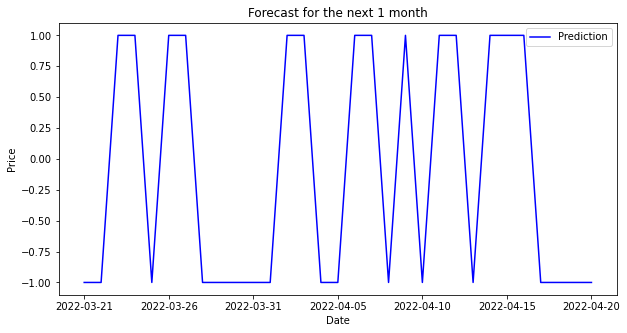

In [71]:
#predicting for one month
onemonth_Data_pred = pd.read_csv("one-month-predictions.csv")
onemonth_Data_pred.set_index("Unnamed: 0", inplace=True)
up_days = min(onemonth_Data_pred["Prediction"])
down_days = max(onemonth_Data_pred["Prediction"])
onemonth_up = onemonth_Data_pred.loc[onemonth_Data_pred["Prediction"] == up_days]
onemonth_down= onemonth_Data_pred.loc[onemonth_Data_pred["Prediction"] == down_days]
print("up days and date")
print(onemonth_down)
print("down days and date")
print(onemonth_up)
onemonth_Data_pred["Prediction"].plot(figsize=(10, 5), title="Forecast for the next 1 month", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Saving into pickle

In [72]:
pickle.dump(rand_frst_clf, open("rand_frst_clf", "wb"))


# Conclusion

Stock market is very volatile, the model accuracy is 70% using Random Forest classifier. This classifier predicts a
percentage of the outcomes for various stocks. I believe my model still has a great amount of room for improvement. 
Such improvement can be attained by adding sentiment analysis which is one of the more successful methods of including the 
effects of market psychology in a trading strategy. This can be used to analyze a company’s likely performance in the stock 
market with respect to global economic conditions.